# Advection Equation

Jupyter notebook to illustrate the stability of the first-order upwind scheme.

Philipp Schlatter, January 2022

---

Initialisation of the libraries and graphics:

In [17]:
%matplotlib widget 
# possible options: notebook, inline or widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.animation
from math import pi
params = {'legend.fontsize': 12,
          'legend.loc':'best',
          'figure.figsize': (8,5),
          'lines.markerfacecolor':'none',
          'axes.labelsize': 12,
          'axes.titlesize': 12,
          'xtick.labelsize':12,
          'ytick.labelsize':12,
          'grid.alpha':0.6}
pylab.rcParams.update(params)

## Perliminaries

Definition of our initial condition, domain size and discretisation points. Here, we take either a wave packet, simply defined as 

$$f_1(x) = \sin(2 (x-10)) \cdot e^{-(x-10)^2/20} \ ,$$

or a square wave (top-hat signal, $f_2(x)$). A third option is a single blop centred around $x=10$,

$$f_3(x) = \cos((x-10)/5) \cdot e^{-(x-10)^2/10} \ .$$



In [18]:
L=100
T=60
c=1

nx=500
x=np.linspace(0,L,num=nx,endpoint=False)
dx=x[1]-x[0]

In [19]:
# Wavepacket
f1 = lambda  x: np.sin(2*(x-10))*np.exp(-(x-10)**2/20)
# Square wave (top-hat function)
f2 = lambda x: np.array([1 if (t>=10 and t<=20) else 0 for t in x])
# one blob
f3 = lambda x: np.cos((x-10)/5)*np.exp(-(x-10)**2/10)

# set initial condition (f1, f2 or f3)
u0=f2(x)
ue=f2(x-T*c)


---

## Advection Equation

In a first step, we consider the advection equation, i.e. the differential equation

$$\frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} = 0 \ .$$

The solution can be obtained via the method of characteristics, and yields

$$u(x,t) = u(x-ct,0) = u_0(x-ct)$$

with the initial condition $u_0(x)$. In a periodic domain ($u(-L/2)=u(L/2)$), we do not need to provide addition inflow/outflow conditions (discussion related to type of partical differential equation, see course literature).

Compute the numerical solution, using an upwind scheme in space and time (**FTBS** - forward time backward space). This scheme is, as discussed later, stable for Courant number $$0<\sigma=c\frac{\Delta t}{\Delta x}<1 \, .$$ 
Note that $\sigma = 1$ corresponds to an exact integration.

In [20]:
sigma = 0.5
# try out: sigma=1, 1.0001, 1.01, 0.9, 0.5
dt = sigma*dx/c

nt = int(T/dt)+1
t=np.linspace(0,T,num=nt)

u1=np.zeros((nx,nt))
u1[:,0] = u0[:]
    
# FTBS scheme for the advection equation
for j in range(1,nt):
    for i in range(1,nx):
        u1[i,j] = u1[i,j-1] - c*dt/dx*( u1[i,j-1]-u1[i-1,j-1])

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_26083/1546341372.py:15: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f'time={t[scale*j]:.2f}  $\sigma$={sigma:.4f}')


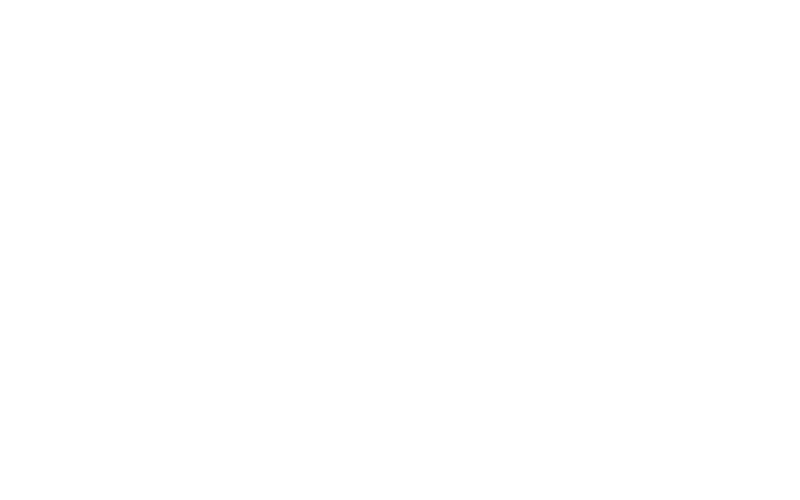

In [21]:
fig = plt.figure(figsize=(8,5))

scale = 1

def animate(j):
    plt.cla()
    plt.xlabel(r'$x$')
    plt.ylabel(r'$f^\prime(x)$')
    plt.grid()
    plt.plot(x,u0,'k--',lw=1,label='initial')
    plt.plot(x,ue,'b--',lw=1,label='end')
    plt.plot(x,u1[:,scale*j],'r',label='advection')
    plt.xlim(0,100)
    #plt.ylim(-1.1,1.1)
    plt.title(f'time={t[scale*j]:.2f}  $\sigma$={sigma:.4f}')  
    #plt.legend(loc='upper right')
    
ani=matplotlib.animation.FuncAnimation(fig, animate, frames=int((t.size-1)/scale+1), repeat=False,interval=1)
#writer = matplotlib.animation.writers['ffmpeg']
#writer = writer(fps=24)
#ani.save('out.mp4', writer=writer)

We can now also show our solution as a so-called _space-time diagram_, where we can see the complete solution $u(x,t)$.

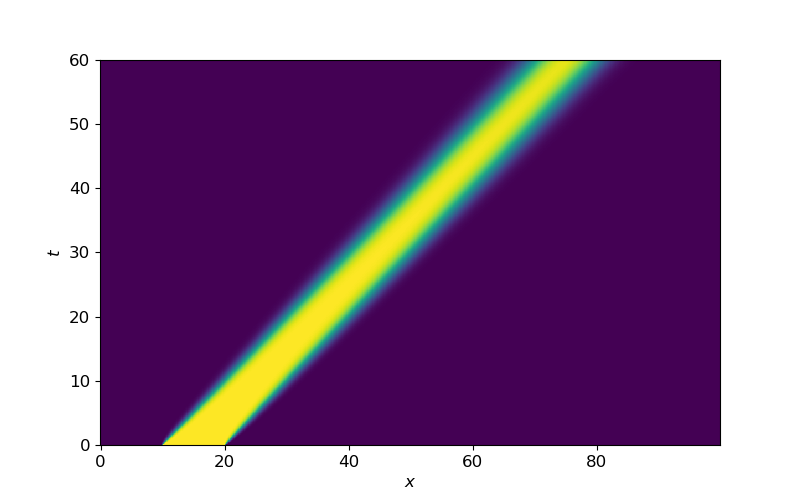

In [22]:
plt.figure()
plt.pcolor(x,t,u1.T,shading='nearest')
plt.xlabel(r'$x$')
plt.ylabel(r'$t$')
plt.show()